# Kaggle - https://www.kaggle.com/c/titanic/overview
* date: 2020/04/29
* author: Aayush Chaturvedi

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Step1: Exploratory Data Analysis(EDA)
- identify patterns, anomalies, and relationships in the data
- informs feature engineering decisions and model selection
- missing values and outliers, class imbalance, and correlation between features

In [47]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print(train_data.info())
print(test_data.info())

# sumary
print(' summary: ')
print(train_data.describe())

# missing values
print(' missing values: ')
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

## Visulalizations

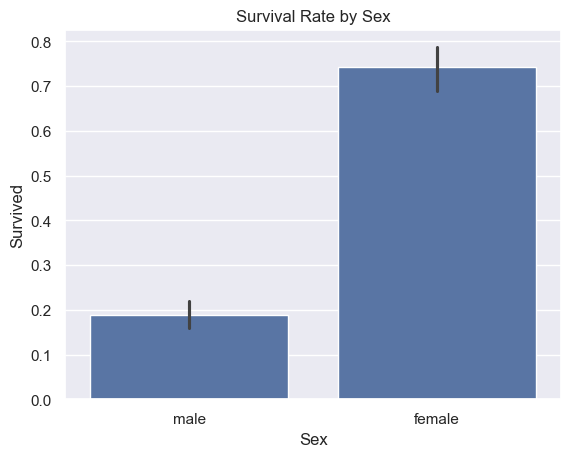

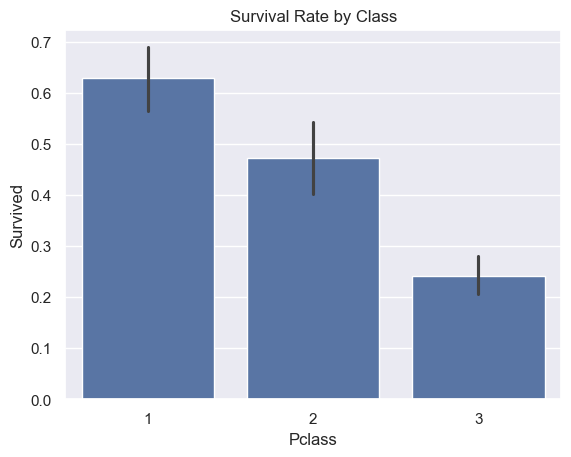

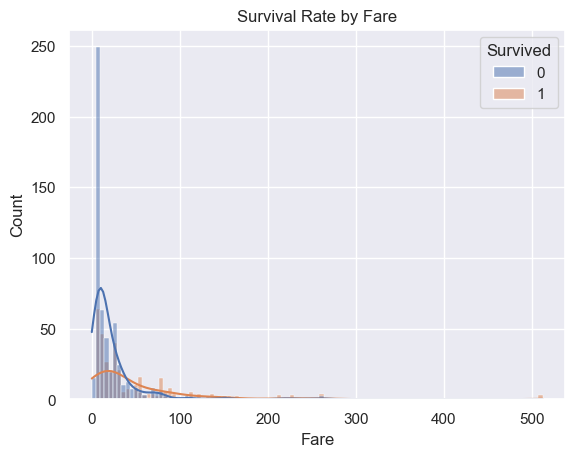

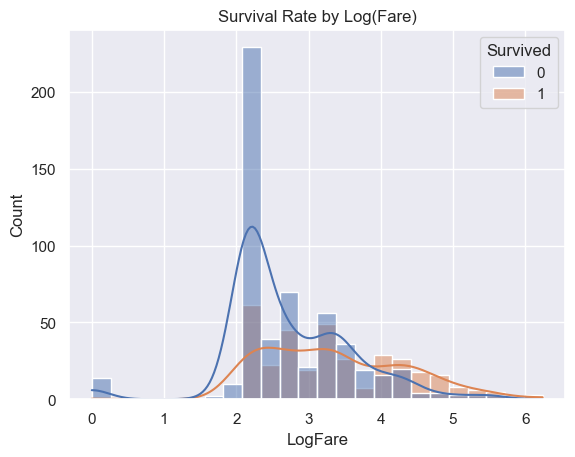

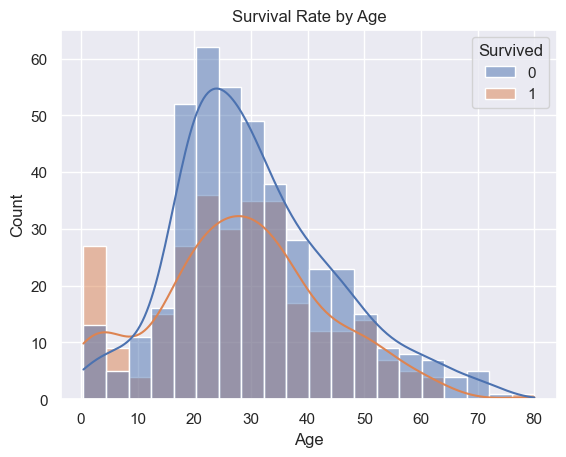

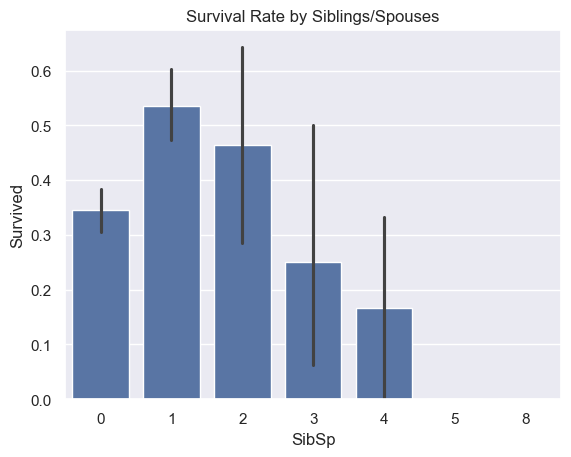

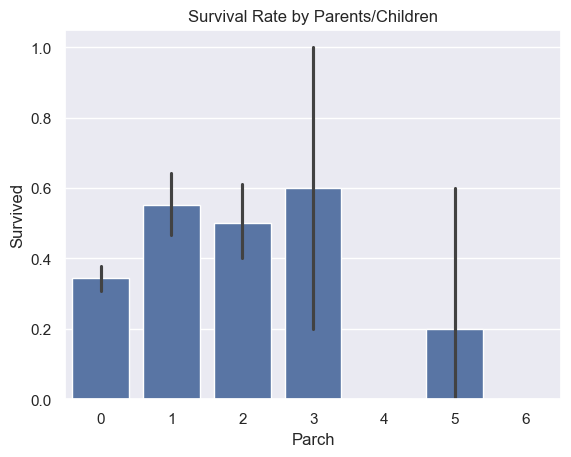

In [ ]:
df = train_data
sns.set(style='darkgrid')

# survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# survival rate by fare
sns.histplot(x='Fare', hue='Survived', data=df, kde=True)
plt.title('Survival Rate by Fare')
plt.show()

# log fare - too much skewed
df['LogFare'] = np.log(df['Fare'] + 1)
sns.histplot(x='LogFare', hue='Survived', data=df, kde=True)
plt.title('Survival Rate by Log(Fare)')
plt.show()

# survival rate by age
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.title('Survival Rate by Age')
plt.show()

# survival rate by sibsp
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by Siblings/Spouses')
plt.show()

# survival rate by parch
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parents/Children')
plt.show()

# Step2. Preprocessing

In [48]:
def preprocss(df):
    # fill missing values with median (Note: not mean because of outliers)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    # fill missing values with mode - most common value
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    # Create new columns
    # Title from name
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    # group rare titles
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')    
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    # Family size
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Is alone
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    
    # One hot encoding
    # Convert categorical variables to dummy variables
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'])
    
    df['LogFare'] = np.log(df['Fare'] + 1)
    
    # Drop unnecessary columns
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize'], axis=1)

    return df

df = train_data
df = preprocss(df)
df.head()

,Survived,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,LogFare
0,0,3,22.0,7.2500,0,False,True,False,False,True,False,False,True,False,False,2.110213
1,1,1,38.0,71.2833,0,True,False,True,False,False,False,False,False,True,False,4.280593
2,1,3,26.0,7.9250,1,True,False,False,False,True,False,True,False,False,False,2.188856
3,1,1,35.0,53.1000,0,True,False,False,False,True,False,False,False,True,False,3.990834
4,0,3,35.0,8.0500,1,False,True,False,False,True,False,False,True,False,False,2.202765


# Step 3: Model Selection & Training

## Model#1: Logistic Regression

Accuracy:  0.7877094972067039
Precision:  0.75
Recall:  0.7297297297297297
F1 Score:  0.7397260273972602


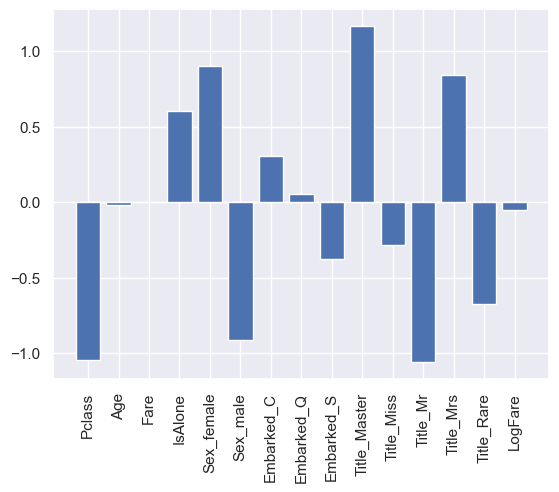

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mod = LogisticRegression(max_iter=10000)

# train
mod.fit(X_train, y_train)

# make predictions
y_pred = mod.predict(X_test)
# evaluate predictions
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

# plot logistic regression coefficients
plt.bar(X.columns, mod.coef_[0])
plt.xticks(rotation=90)
plt.show()



# Model2: Decision Tree

In [60]:
# implement decision tree on df

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Accuracy: 0.7835820895522388
Precision: 0.7523809523809524
Recall: 0.7117117117117117
F1 Score: 0.7314814814814815


# Multiple Modeles - with cross validation

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")
    # also print recall, f1 and precision
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    print(f"{name} recall: {scores.mean():.4f}")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"{name} f1: {scores.mean():.4f}")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    print(f"{name} precision: {scores.mean():.4f}")
    print()
    

Logistic Regression: 0.8026
Logistic Regression recall: 0.7145
Logistic Regression f1: 0.7290
Logistic Regression precision: 0.7445

Decision Tree: 0.7674
Decision Tree recall: 0.6926
Decision Tree f1: 0.6976
Decision Tree precision: 0.6824

Random Forest: 0.7978
Random Forest recall: 0.7101
Random Forest f1: 0.7168
Random Forest precision: 0.7346

SVM: 0.6613
SVM recall: 0.2122
SVM f1: 0.3168
SVM precision: 0.6514

KNN: 0.7111
KNN recall: 0.5625
KNN f1: 0.5886
KNN precision: 0.6195

XGBoost: 0.8138
XGBoost recall: 0.7402
XGBoost f1: 0.7458
XGBoost precision: 0.7525



## Final selection - 
* seems like XGB is the best model for this dataset

```
Logistic Regression: 0.8026
Logistic Regression recall: 0.7145
Logistic Regression f1: 0.7290
Logistic Regression precision: 0.7445

Decision Tree: 0.7674
Decision Tree recall: 0.6926
Decision Tree f1: 0.6976
Decision Tree precision: 0.6824

Random Forest: 0.7978
Random Forest recall: 0.7101
Random Forest f1: 0.7168
Random Forest precision: 0.7346

SVM: 0.6613
SVM recall: 0.2122
SVM f1: 0.3168
SVM precision: 0.6514

KNN: 0.7111
KNN recall: 0.5625
KNN f1: 0.5886
KNN precision: 0.6195

XGBoost: 0.8138
XGBoost recall: 0.7402
XGBoost f1: 0.7458
XGBoost precision: 0.7525
```

In [78]:
# prediction on test set
from xgboost import XGBClassifier

test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

# Store PassengerId before preprocessing
passenger_ids = test_df['PassengerId'].copy()

test_df = preprocss(test_df)
train_df = preprocss(train_df)
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
submission = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)

